# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

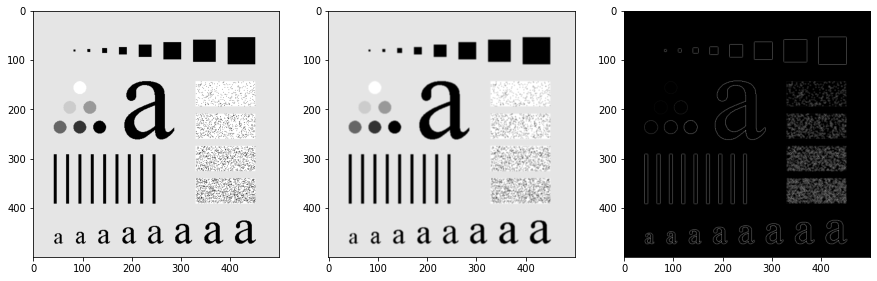

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from scipy import signal


# Obrazki
if not os.path.exists("jet.png") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png 
if not os.path.exists("kw.png") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png 
if not os.path.exists("moon.png") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/moon.png 
if not os.path.exists("lenaSzum.png") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaSzum.png 
if not os.path.exists("lena.png") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lena.png 
if not os.path.exists("plansza.png") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/plansza.png 

plansza = cv2.imread('plansza.png')
plansza = cv2.cvtColor(plansza, cv2.COLOR_BGR2GRAY)
filtr3 = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(plansza,-1,filtr3)
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
module = cv2.subtract(plansza, dst)
axs[0].imshow(plansza, cmap = 'gray')
axs[1].imshow(dst, cmap = 'gray')
axs[2].imshow(module, cmap = 'gray')
plt.show()

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

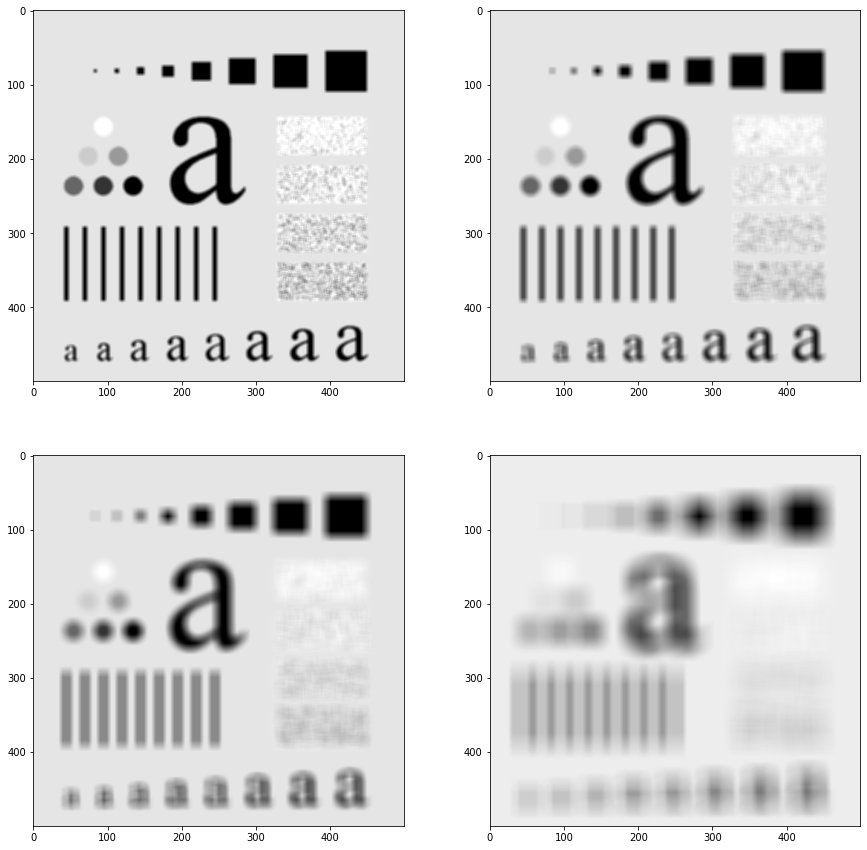

In [2]:
filtr5 = np.ones((5,5),np.float32)/25
filtr9 = np.ones((9,9),np.float32)/81
filtr15 = np.ones((15,15),np.float32)/225
filtr35 = np.ones((35,35),np.float32)/1225
dst5 = cv2.filter2D(plansza,-1,filtr5)
dst9 = cv2.filter2D(plansza,-1,filtr9)
dst15 = cv2.filter2D(plansza,-1,filtr15)
dst35 = cv2.filter2D(plansza,-1,filtr35)
fig, axs = plt.subplots(2, 2, figsize=(15,15))
axs[0][0].imshow(dst5, cmap='gray')
axs[0][1].imshow(dst9, cmap='gray')
axs[1][0].imshow(dst15, cmap='gray')
axs[1][1].imshow(dst35, cmap='gray')
plt.show()

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

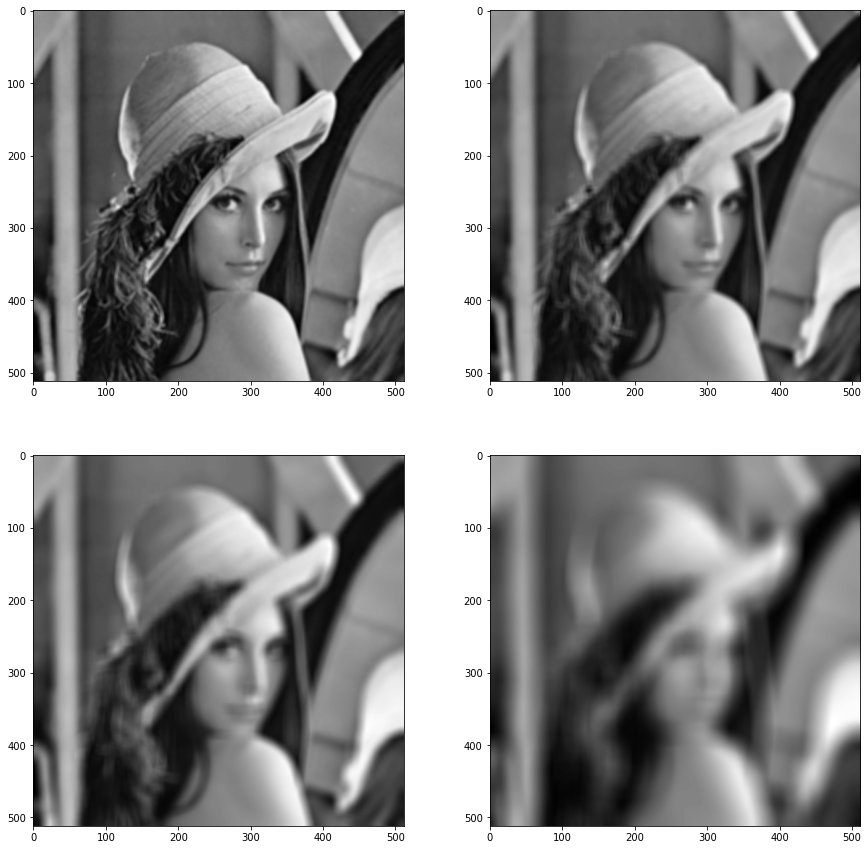

In [3]:
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena,  cv2.COLOR_BGR2GRAY)

dst5 = cv2.filter2D(lena,-1,filtr5)
dst9 = cv2.filter2D(lena,-1,filtr9)
dst15 = cv2.filter2D(lena,-1,filtr15)
dst35 = cv2.filter2D(lena,-1,filtr35)
fig, axs = plt.subplots(2, 2, figsize=(15,15))
axs[0][0].imshow(dst5, cmap = 'gray')
axs[0][1].imshow(dst9, cmap = 'gray')
axs[1][0].imshow(dst15, cmap = 'gray')
axs[1][1].imshow(dst35, cmap = 'gray')
plt.show()

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

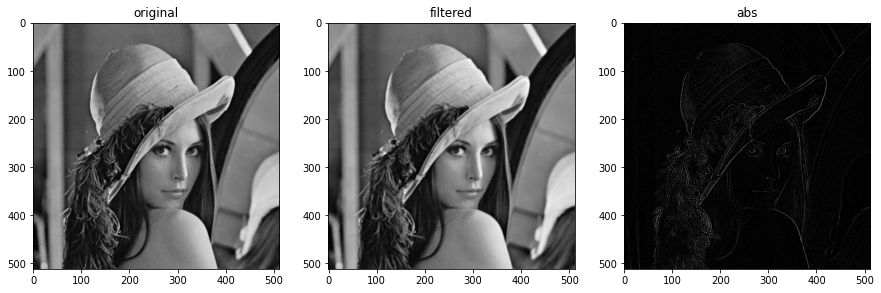

In [4]:
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena,  cv2.COLOR_BGR2GRAY)
M = np.array([[1,2,1], [2,4,2], [1,2,1]])
M = M/sum(sum(M))
dst = cv2.filter2D(lena,-1,M)
mod = cv2.subtract(dst,lena)
fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].imshow(lena, cmap = 'gray')
axs[0].set_title('original')
axs[1].imshow(dst, cmap = 'gray')
axs[1].set_title('filtered')
axs[2].imshow(mod, cmap = 'gray')
axs[2].set_title('abs')
plt.show()

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


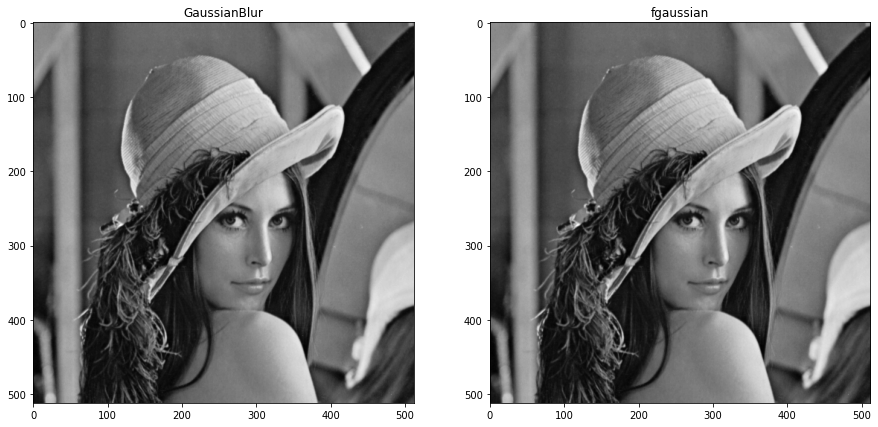

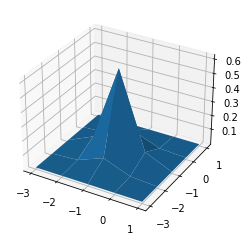

In [5]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()
    
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena,  cv2.COLOR_BGR2GRAY)    
mask = fgaussian(5, 0.5)
blur = cv2.GaussianBlur(lena,(5,5),0.5)
dst = cv2.filter2D(lena,-1,mask)
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(blur, cmap = 'gray')
axs[0].set_title('GaussianBlur')
axs[1].imshow(dst, cmap = 'gray')
axs[1].set_title('fgaussian')
plt.show()
vis = mesh(mask, 5)

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


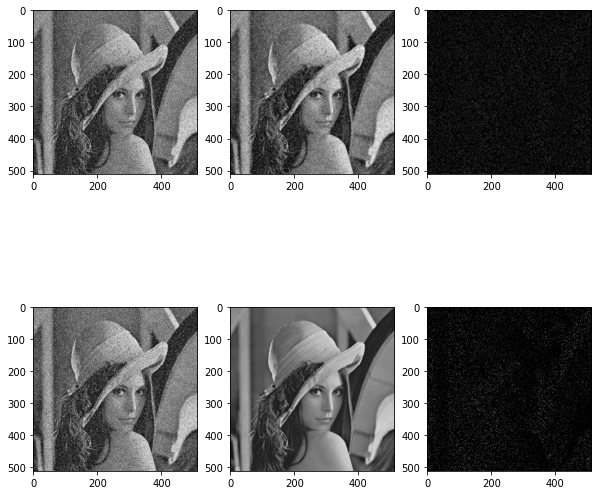

In [6]:
lena2 = cv2.imread('lenaSzum.png')
lena2 = cv2.cvtColor(lena2,  cv2.COLOR_BGR2GRAY)

filtr3 = np.ones((3,3),np.float32)/9
aver = cv2.filter2D(lena2,-1,filtr3)
median = cv2.medianBlur(lena2, 3)
mod1 = cv2.subtract(aver, lena2)
mod2 = cv2.subtract(lena2, median)
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
axs[0][0].imshow(lena2, cmap='gray')
axs[0][1].imshow(aver, cmap='gray')
axs[0][2].imshow(mod1, cmap='gray')
axs[1][0].imshow(lena2, cmap='gray')
axs[1][1].imshow(median, cmap='gray')
axs[1][2].imshow(mod2, cmap='gray')
plt.show()

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

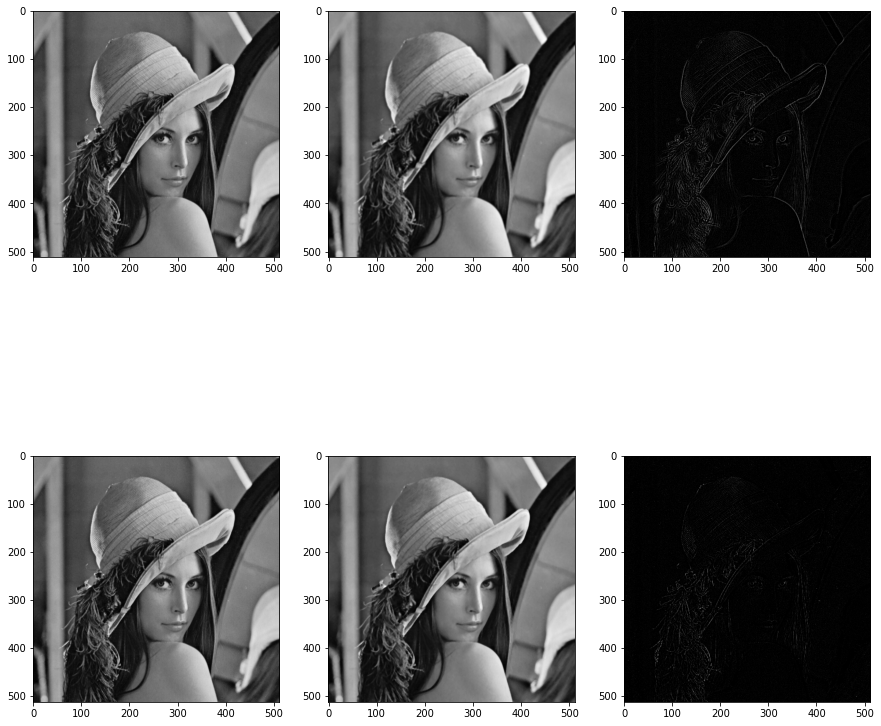

In [7]:
lena2 = cv2.imread('lenaSzum.png')
lena2 = cv2.cvtColor(lena2,  cv2.COLOR_BGR2GRAY)

filtr3 = np.ones((3,3),np.float32)/9
aver = cv2.filter2D(lena,-1,filtr3)
median = cv2.medianBlur(lena, 3)
mod1 = cv2.subtract(aver, lena)
mod2 = cv2.subtract(lena, median)
fig, axs = plt.subplots(2, 3, figsize=(15, 15))
axs[0][0].imshow(lena, cmap='gray')
axs[0][1].imshow(aver, cmap='gray')
axs[0][2].imshow(mod1, cmap='gray')
axs[1][0].imshow(lena, cmap='gray')
axs[1][1].imshow(median, cmap='gray')
axs[1][2].imshow(mod2, cmap='gray')
plt.show()

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

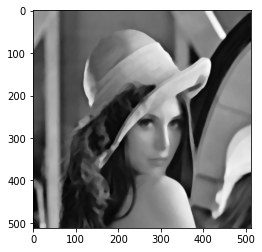

In [8]:
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena,  cv2.COLOR_BGR2GRAY)
for i in range(10):
    lena = cv2.medianBlur(lena, 5)
    
plt.imshow(lena, cmap='gray')
plt.show()

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

Text(0.5, 1.0, 'laplacian 128')

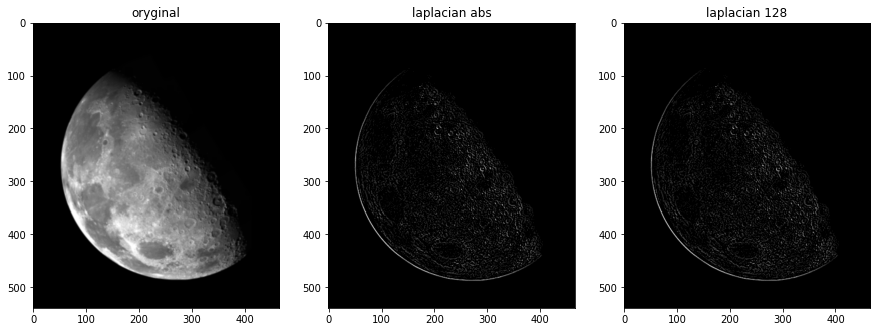

In [9]:
moon_col = cv2.cvtColor(cv2.imread('moon.png'), cv2.COLOR_BGR2GRAY)
moon = cv2.imread('moon.png')

L = np.array([[0,1,0], [1,-4,1], [0,1,0]])/9
laplace = cv2.filter2D(moon_col,-1, L)
laplacian_128 = laplace + 128
laplacian_abs = abs(laplace)

lap_test = cv2.Laplacian(moon,cv2.CV_64F)
f, axs = plt.subplots(1,3,figsize=(15,15))
axs[0].imshow(moon_col,cmap = 'gray')
axs[0].set_title('oryginal')
axs[1].imshow(laplacian_abs,cmap = 'gray')
axs[1].set_title('laplacian abs')
axs[2].imshow(laplacian_128,cmap = 'gray')
axs[2].set_title('laplacian 128')



7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



Text(0.5, 1.0, 'diff')

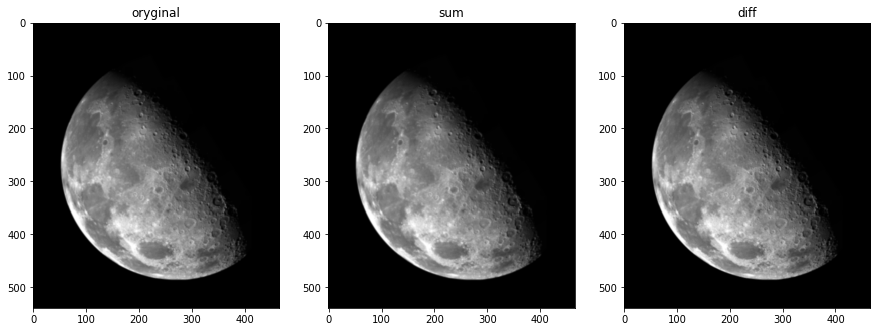

In [10]:
f, axs = plt.subplots(1,3,figsize=(15,15))
axs[0].imshow(moon_col.astype('int16'),cmap = 'gray')
axs[0].set_title('oryginal')
axs[1].imshow(moon_col.astype('int16') + laplace,cmap = 'gray')
axs[1].set_title('sum')
axs[2].imshow(abs(laplace - moon_col.astype('int16')),cmap = 'gray')
axs[2].set_title('diff')

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

Text(0.5, 1.0, 'S')

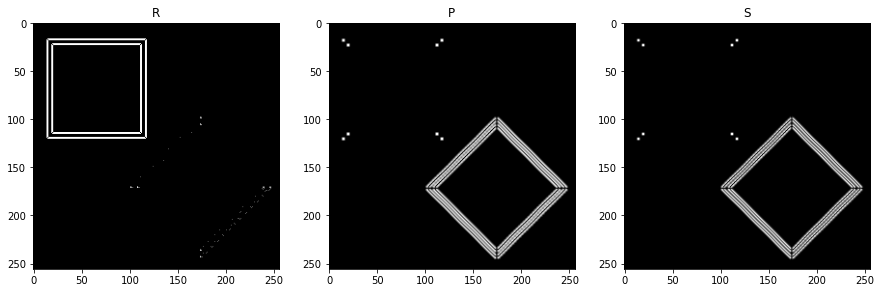

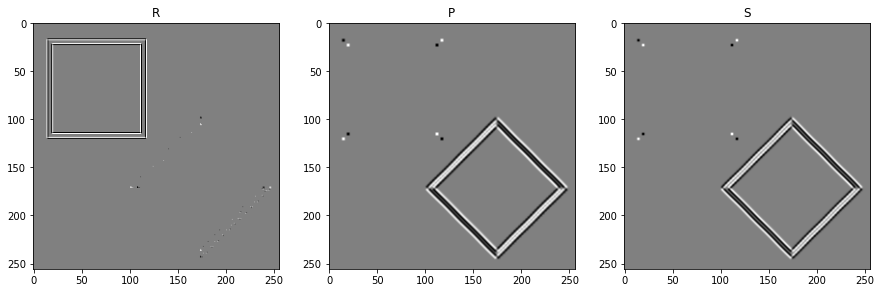

In [11]:
kw = cv2.cvtColor(cv2.imread('kw.png'), cv2.COLOR_BGR2GRAY)
kw = kw.astype('int16')
R1 = np.array([[0,0,0], [-1,0,0], [0,1,0]])/9
R2 = np.array([[0,0,0], [0,0,-1], [0,1,0]])/9

P1 = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])/9
P2 = np.array([[-1,-1,-1], [0,0,0], [1,1,1]])/9

S1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])/9
S2 = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])/9

I1 = cv2.filter2D(kw,-1,R1)
I1 = cv2.filter2D(I1,-1,R2)

I2 = cv2.filter2D(kw,-1,P1)
I2 = cv2.filter2D(I2,-1,P2)


I3 = cv2.filter2D(kw,-1,S1)
I3 = cv2.filter2D(I3,-1,S2)

I1_abs = abs(I1)
I1_128 = I1 + 128
I2_abs = abs(I2)
I2_128 = I2 +128
I3_abs = abs(I3)
I3_128 = I3 +128
 
f, axs = plt.subplots(1,3,figsize=(15,15))
axs[0].imshow(I1_abs,cmap = 'gray')
axs[0].set_title('R')
axs[1].imshow(I2_abs,cmap = 'gray')
axs[1].set_title('P')
axs[2].imshow(I3_abs,cmap = 'gray')
axs[2].set_title('S')
f, axs = plt.subplots(1,3,figsize=(15,15))
axs[0].imshow(I1_128,cmap = 'gray')
axs[0].set_title('R')
axs[1].imshow(I2_128,cmap = 'gray')
axs[1].set_title('P')
axs[2].imshow(I3_128,cmap = 'gray')
axs[2].set_title('S')


5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



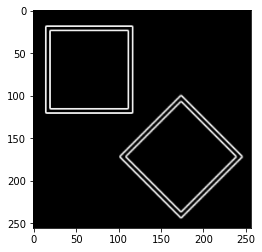

In [12]:
import math 
kw = cv2.cvtColor(cv2.imread('kw.png'), cv2.COLOR_BGR2GRAY)
kw = kw.astype('int16')
S1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])/9
S2 = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])/9
O1 = cv2.filter2D(kw,-1,S1)
O2 = cv2.filter2D(kw,-1,S2)


#OW = np.sqrt((P1 + P2))
OW = np.power((O1**2 + O2**2),0.5)
plt.imshow(OW, cmap = 'gray')
plt.show()

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

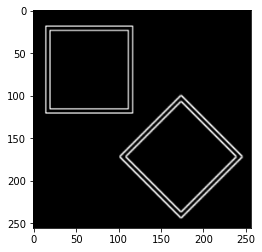

In [13]:
import math 
S1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])/9
S2 = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])/9
O1 = cv2.filter2D(kw,-1,S1)
O2 = cv2.filter2D(kw,-1,S2)
OW = abs(O1) + abs(O2)
plt.imshow(OW, cmap = 'gray')
plt.show()

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

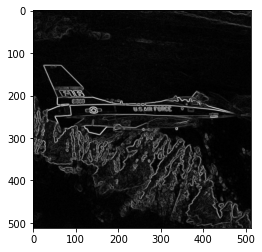

In [14]:
jet = cv2.cvtColor(cv2.imread('jet.png'), cv2.COLOR_BGR2GRAY)
jet = jet.astype('int16')
S1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])/9
S2 = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])/9
O1 = cv2.filter2D(jet,-1,S1)
O2 = cv2.filter2D(jet,-1,S2)

OW = np.power((O1**2 + O2**2),0.5)

plt.imshow(OW, cmap = 'gray')
plt.show()

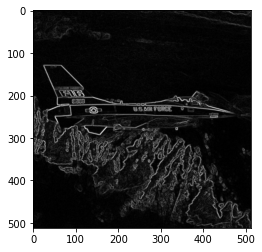

In [15]:
OW2 = abs(O1) + abs(O2)
plt.imshow(OW2, cmap = 'gray')
plt.show()